In [128]:
import numpy as np
import matplotlib.pyplot as plt

EXERCICIO 2

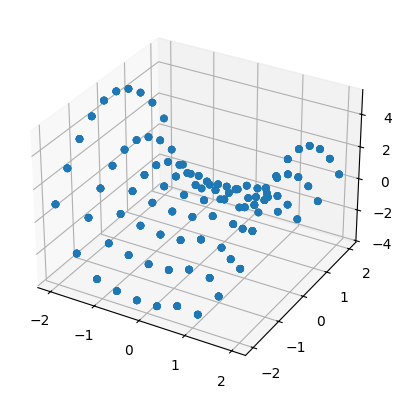

(10, 10, 10) (1000,)


In [ ]:
# A
arq = np.load('ex2.npz')
x = arq['x']
y = arq['y']
z = arq['z']


id = np.argsort(x)
x = x[id]
y = y[id]
z = z[id]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
plt.show()

# achata -> 10, 10, 10 -> 1000, 1
x_r = x.ravel()
y_r = y.ravel()
z_r = z.ravel()

print (x.shape, x_r.shape)

A = np.ones((len(x_r), 6))
A[:, 1] = x_r
A[:, 2] = y_r
A[:, 3] = x_r ** 2
A[:, 4] = y_r ** 2
A[:, 5] = x_r * y_r

coef = np.linalg.lstsq(A, z_r, rcond= 0)[0]

f = lambda X, Y: coef[0] + coef[1] * X + coef[2] * Y + coef[3] * (X ** 2) + coef[4] * (Y ** 2) +  coef[5] * (X * Y)




In [130]:
# B

""" 
    erros = z_r - f(x_r, y_r)

    rms = raiz (média dos erros ao quadrado)

 """

rms = np.sqrt( np.mean( (z_r - f(x_r, y_r))**2 ))

print (rms)



0.3817123546182512


Text(0.5, 0.92, '3D superficie de f(x,y)')

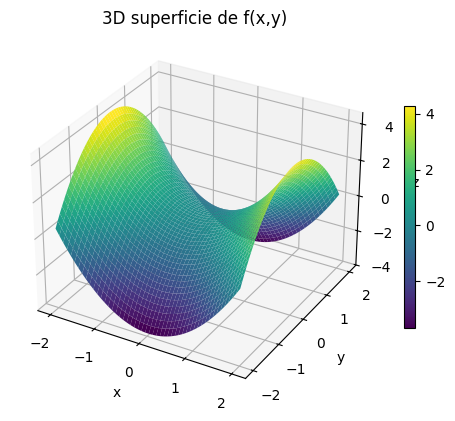

In [131]:
# C
x_grid = np.linspace(x.min(), x.max(), 50)
y_grid = np.linspace(y.min(), y.max(), 50)
X, Y = np.meshgrid(x_grid, y_grid)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', antialiased=True)
fig.colorbar(surf, ax=ax, shrink=0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D superficie de f(x,y)')